In [73]:
import numpy as np
import matplotlib.pyplot as plt
import os


def str_to_dict(s):
    import re
    x = re.split(",", s[1:-1])
    res = dict()
    for i in x:
        key, value = i.strip().split(":")
        res[key[1:-1]] = float(value)
    return res

def make_smooth(value,window=10):
    new_value=[]
    for i in range(len(value)):
        start=max(i-window,0)
        final=min(len(value),i+window)
        new_value.append(sum(value[start:final])/(final-start))
    return new_value

def plot_ris(dir, axs, keys,name,y_lim=None,smooth=False,color=None,combine_keys=None):
    a = open(dir, 'r')
    a = a.read().split('\n')[:-1]
    a = [str_to_dict(b) for b in a]
    for i,key in enumerate(keys):
        values = [s[key] for s in a]
        if smooth:
            values=make_smooth(values)
        axs[i].plot(np.arange(len(values)), values, label=name,color=color)
        axs[i].plot(1500, 0)
        axs[i].set_title(key)
        axs[i].legend()
        if y_lim is not None:
            axs[i].set_ylim(y_lim[i])
    if combine_keys is not None:
        for j, x in enumerate(combine_keys):
            x,y,f=x
            i=len(keys)+j
            
            values = [f(s[x],s[y]) for s in a]
            if smooth:
                x=make_smooth([s[x] for s in a])
                y=make_smooth([s[y] for s in a])
                values = make_smooth([f(x1,y1) for x1,y1 in zip(x,y)])
            axs[i].plot(np.arange(len(values)), values, label=name,color=color)
            axs[i].plot(1500, 0)
            axs[i].set_title("combine_keys")
            axs[i].legend()
            
    return 0

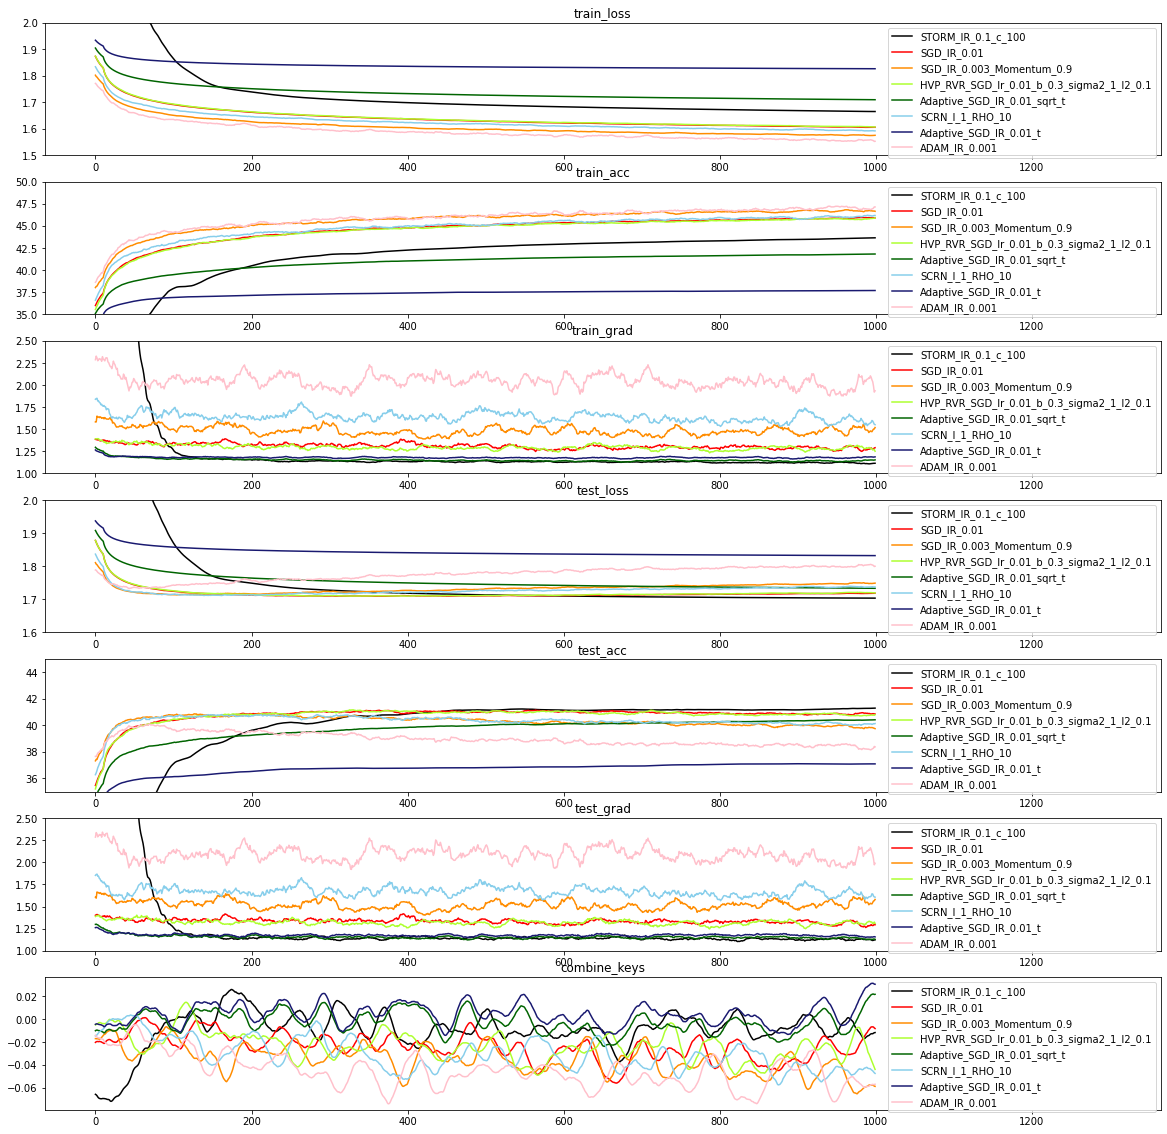

In [70]:
dir='Final_logs/Classifier/OneLayerLinearNet/'
keys=['train_loss','train_acc','train_grad','test_loss','test_acc','test_grad']
y_lim=[[1.5,2],[35,50],[1,2.5],[1.6,2],[35,45],[1,2.5]]
fig, axs = plt.subplots(7, figsize=(20, 20))
colors=['black','red','darkorange','greenyellow','darkgreen','skyblue','midnightblue','pink','slategrey','purple']
names = os.listdir(dir)
combine_keys=[('train_grad','test_grad',lambda x,y: x-y)]
for i,name in enumerate(names):
    plot_ris(dir + name, axs, keys=keys,name=name,y_lim=y_lim,smooth=True,color=colors[i%len(colors)],combine_keys=combine_keys)
plt.show()

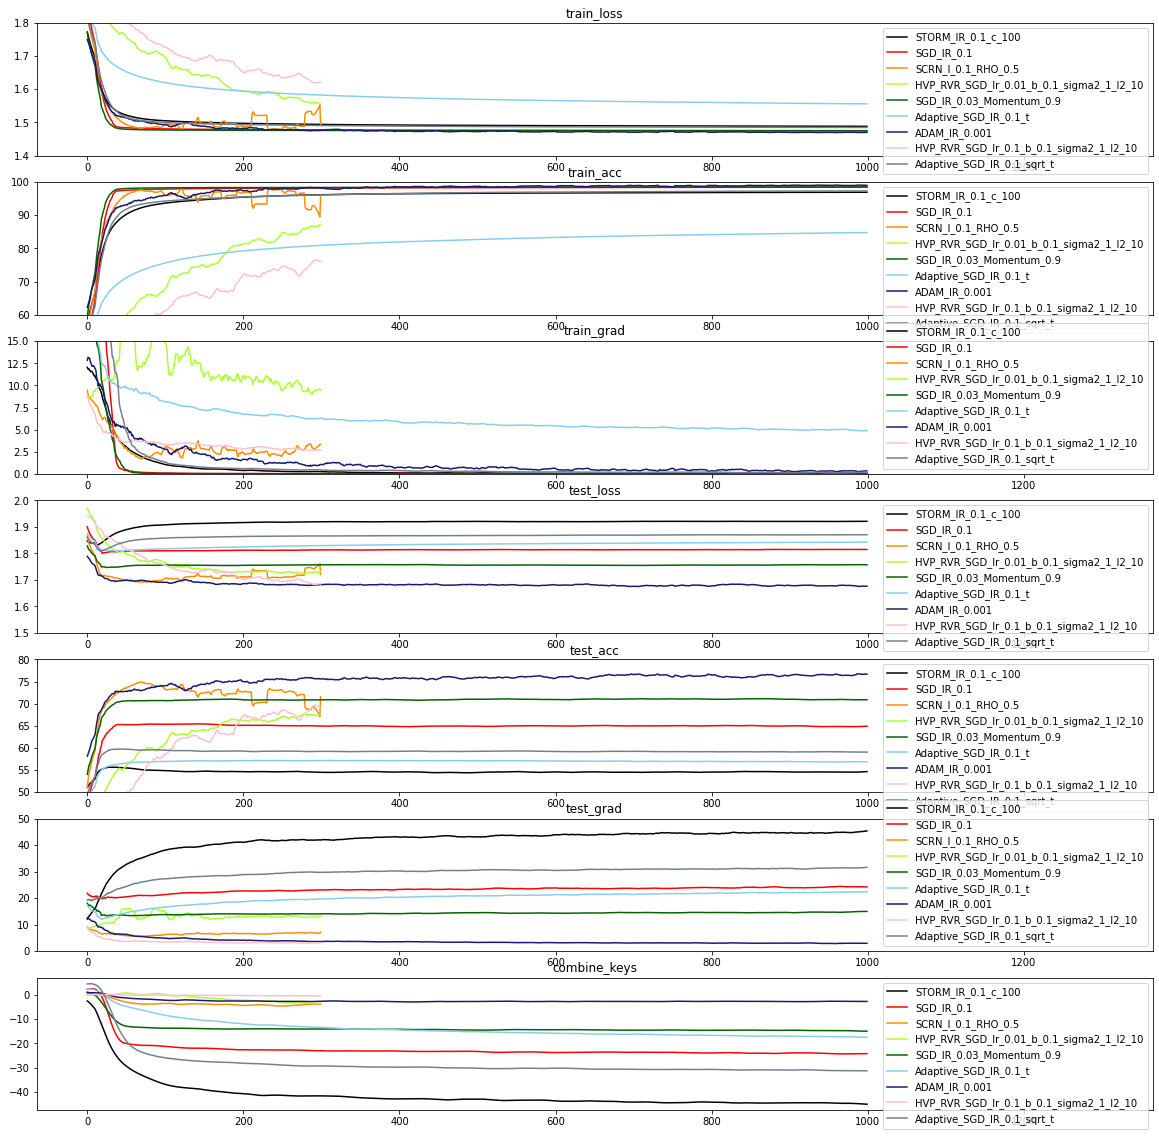

In [69]:
dir='Final_logs/Classifier/ResNet/'
keys=['train_loss','train_acc','train_grad','test_loss','test_acc','test_grad']
y_lim=[[1.4,1.8],[60,100],[0,15],[1.5,2],[50,80],[0,50]]
fig, axs = plt.subplots(7, figsize=(20, 20))
colors=['black','red','darkorange','greenyellow','darkgreen','skyblue','midnightblue','pink','slategrey','purple']
names = os.listdir(dir)
combine_keys=[('train_grad','test_grad',lambda x,y: x-y)]
for i,name in enumerate(names):
    plot_ris(dir + name, axs, keys=keys,name=name,y_lim=y_lim,smooth=True,color=colors[i%len(colors)],combine_keys=combine_keys)
plt.show()

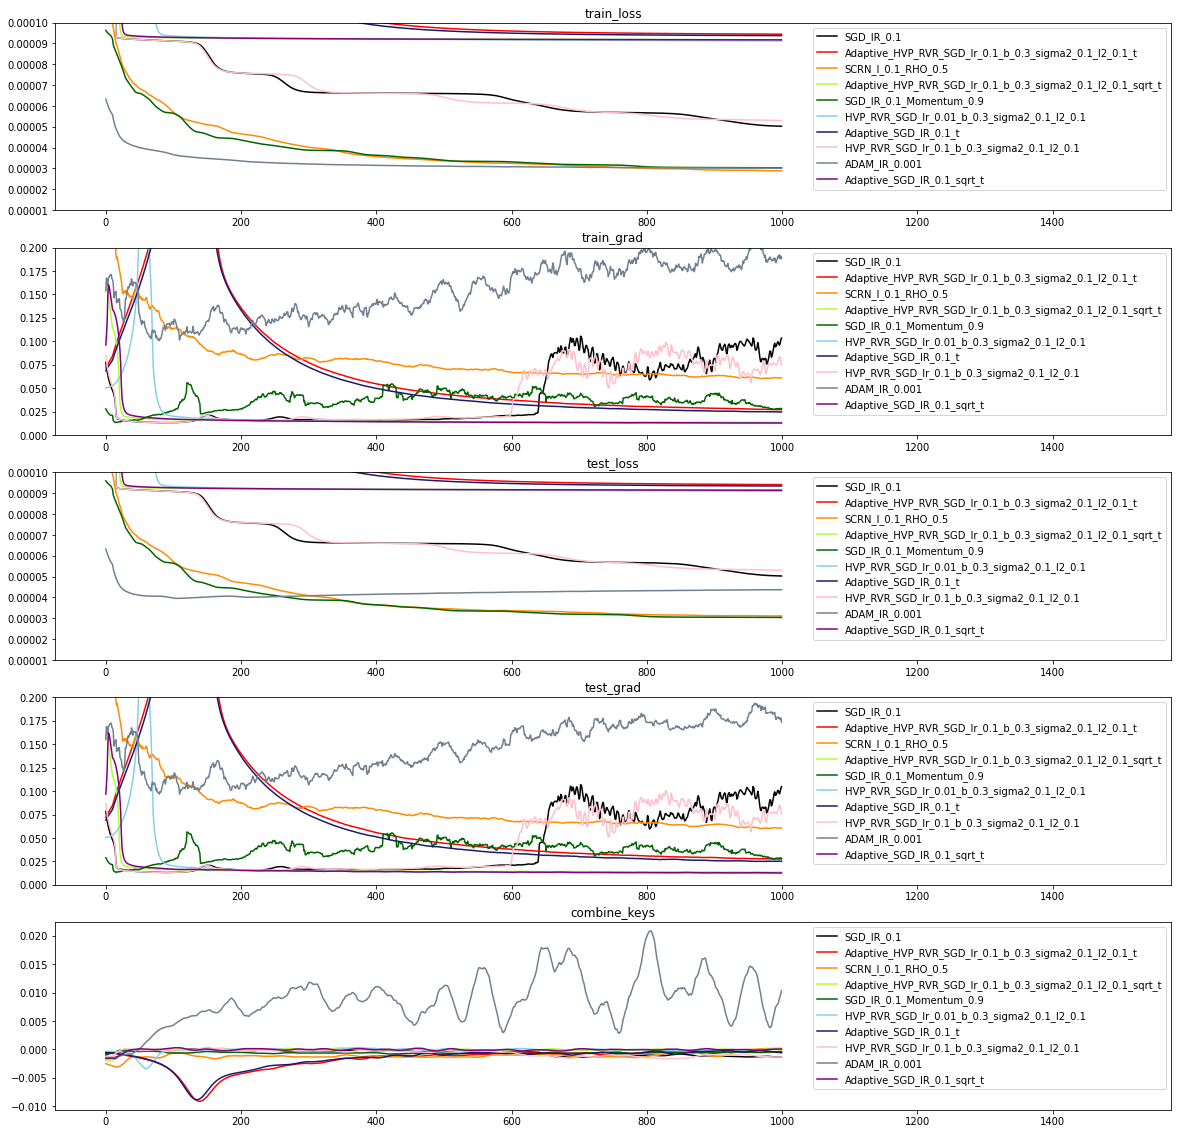

In [74]:
dir='Final_logs/AutoEncoder/'
keys=['train_loss','train_grad','test_loss','test_grad']
y_lim=[[1e-5,1e-4],[0,0.2],[1e-5,1e-4],[0,0.2]]
fig, axs = plt.subplots(5, figsize=(20, 20))
colors=['black','red','darkorange','greenyellow','darkgreen','skyblue','midnightblue','pink','slategrey','purple']
names = os.listdir(dir)
combine_keys=[('train_grad','test_grad',lambda x,y: x-y)]
for i,name in enumerate(names):
    plot_ris(dir + name, axs, keys=keys,name=name,y_lim=y_lim,smooth=True,color=colors[i%len(colors)],combine_keys=combine_keys)
plt.show()